In [1]:
#Hack to fix missing PROJ4 env var
import os
import conda
conda_file_dir = conda.__file__
conda_dir = conda_file_dir.split('lib')[0]
proj_lib = os.path.join(os.path.join(conda_dir, 'share'), 'proj')
os.environ["PROJ_LIB"] = proj_lib
from mpl_toolkits.basemap import Basemap

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
gap_notreg = pd.read_csv('./data/gap_notreg_off_clusters.csv')
gap_notreg.head()

,mmsi,gap_hours,gap_distance_m,gap_implied_speed_knots,positions_per_day,vessel_class,flag,off_timestamp,off_msgid,off_lat,...,off_receiver_type,off_distance_from_shore_m,on_timestamp,on_msgid,on_lat,on_lon,on_type,on_receiver_type,on_distance_from_shore_m,off_cluster
0,412422839,39.433333,535.624620,0.007334,0.034917,fishing,CHN,2018-11-02 08:32:54+00:00,ab04ae1f-022d-1cf8-6704-79f5c18f03fe,29.940583,...,terrestrial,0.0,2018-11-03 23:59:40+00:00,d66f5755-1e80-50b7-9c24-97affcd0d30b,29.938277,122.273638,B,terrestrial,1000.0,0
1,247143160,80.800000,1260.751756,0.008425,2.947519,trawlers,ITA,2018-05-18 18:22:40+00:00,a08e856c-e011-5dab-8ae8-03a4bf0c7ba1,38.099993,...,terrestrial,0.0,2018-05-22 03:11:32+00:00,97e47f62-0784-5e70-bea4-b57c23dcab63,38.088952,13.540445,A,terrestrial,0.0,1
2,224231150,15.816667,9683.318918,0.330574,0.115448,set_gillnets,ESP,2018-03-22 11:28:05+00:00,b4fbb421-1944-5a5f-b3ae-aabb589bb8d3,43.406192,...,terrestrial,3000.0,2018-03-23 03:17:34+00:00,7137847e-305e-5a4f-8b82-ab83b181c4ab,43.354105,-8.375345,B,terrestrial,1000.0,2
3,413002111,14.433333,2965.614746,0.110945,0.416022,trawlers,CHN,2018-02-28 19:59:57+00:00,06e02215-e3b7-59ac-8504-f404fc25196c,26.573672,...,terrestrial,42000.0,2018-03-01 10:26:32+00:00,499bb4b5-a209-5f79-9718-ea361000bbdc,26.564128,120.902237,A,terrestrial,44000.0,0
4,247074840,16.450000,495.809447,0.016275,0.538665,trawlers,ITA,2018-04-25 07:43:16+00:00,248c64e1-6d7b-5553-bffe-8974fc455332,44.675090,...,terrestrial,0.0,2018-04-26 00:10:43+00:00,5659fa33-6771-584a-95a5-4d35df3f544f,44.675367,12.235438,A,terrestrial,0.0,3


In [20]:
# Break into individual dataframes
cluster0 = gap_notreg[gap_notreg['off_cluster'] == 0]
cluster11 = gap_notreg[gap_notreg['off_cluster'] == 11]
cluster18 = gap_notreg[gap_notreg['off_cluster'] == 18]

In [32]:
cluster18[['off_lat', 'off_lon', 'off_cluster']].sort_values(by='off_lat')

,off_lat,off_lon,off_cluster
97427,23.823930,121.622532,18
198,23.861378,121.898920,18
173185,23.861835,121.934187,18
315311,23.903153,121.630087,18
201190,23.904053,121.627163,18
...,...,...,...
305949,25.877162,122.365020,18
180195,25.878532,122.308483,18
196530,25.891805,122.219318,18
133300,25.892318,122.169480,18


In [30]:
cluster0[['off_lat', 'off_lon', 'off_cluster']].sort_values(by='off_lon')

,off_lat,off_lon,off_cluster
209718,20.194617,109.364280,0
137511,20.278692,109.422013,0
336927,20.292423,109.445463,0
39712,20.380855,109.468758,0
223223,20.054665,109.475067,0
...,...,...,...
117827,39.772400,124.136373,0
316016,39.717597,124.136467,0
49024,39.747223,124.148187,0
318287,39.866658,124.216687,0


In [27]:
cluster11[['off_lat', 'off_lon', 'off_cluster']].sort_values(by='off_lat')

,off_lat,off_lon,off_cluster
344222,32.586263,126.662173,11
337551,32.586667,126.346667,11
96362,32.610470,125.912912,11
304350,32.616667,126.538333,11
130231,32.617988,126.305697,11
...,...,...,...
25947,37.566308,126.575522,11
89371,37.570742,126.038882,11
116674,37.587998,126.538447,11
284594,37.643935,126.391950,11


In [9]:
# Extract data to use in map

lat = gap_notreg['off_lat'].to_numpy()
lon = gap_notreg['off_lon'].to_numpy()
clusters = gap_notreg['off_cluster'].to_numpy()

/Users/jessicaertel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  # Remove the CWD from sys.path while we load stuff.
/Users/jessicaertel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  app.launch_new_instance()
/Users/jessicaertel/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.


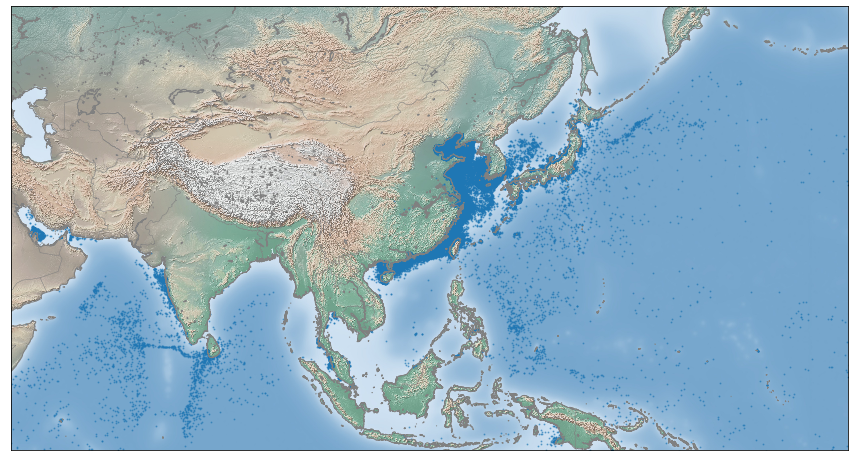

In [36]:
# llcrnrlon: lon lower left
# llcrnrlat: lat lower left
# urcrnrlon: lon upper right
# urcrnrlat: lat upper right

# 1. Draw the map background
fig = plt.figure(figsize=(15, 15))
m = Basemap(projection='mill', resolution='h', 
            llcrnrlon=47.109375, llcrnrlat=-9.449062,
            urcrnrlon=186.328125, urcrnrlat=57.136239)
#             lat_0=19.830017, lon_0=110.765533, 
#             width=1E6, height=1.2E6)

m.shadedrelief()
m.drawcoastlines(color='gray')
m.drawcountries(color='gray')
m.drawstates(color='gray')

# 2. scatter city data, with color reflecting cluster
# and size reflecting area
m.scatter(lon, lat, latlon=True,
          s=1,
          cmap='Reds', alpha=0.5);

# # 3. create colorbar and legend
# plt.colorbar(label=r'Average Hours')
# plt.clim(3, 6)


In [16]:
from itertools import chain

def draw_map(m, scale=0.2):
    # draw a shaded-relief image
    m.shadedrelief(scale=scale)
    
    # lats and longs are returned as a dictionary
    lats = m.drawparallels(np.linspace(-90, 90, 13))
    lons = m.drawmeridians(np.linspace(-180, 180, 13))

    # keys contain the plt.Line2D instances
    lat_lines = chain(*(tup[1][0] for tup in lats.items()))
    lon_lines = chain(*(tup[1][0] for tup in lons.items()))
    all_lines = chain(lat_lines, lon_lines)
    
    # cycle through these lines and set the desired style
    for line in all_lines:
        line.set(linestyle='-', alpha=0.3, color='w')

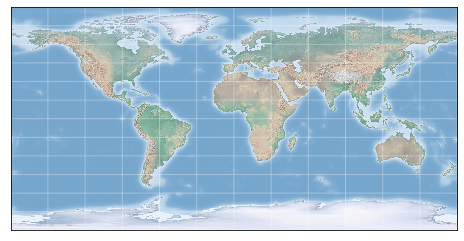

In [17]:
fig = plt.figure(figsize=(8, 6), edgecolor='w')
m = Basemap(projection='cyl', resolution=None,
            llcrnrlat=-90, urcrnrlat=90,
            llcrnrlon=-180, urcrnrlon=180, )
draw_map(m)

## References
- https://github.com/conda-forge/basemap-feedstock/issues/30#issuecomment-423512069
- https://jakevdp.github.io/PythonDataScienceHandbook/04.13-geographic-data-with-basemap.html
- https://www.latlong.net/